# Importing the required Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Reading the data using Pandas 

In [2]:
df = pd.read_csv('QualityPrediction.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# we will get the non null count and Data types of the all columns(features)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Checking for Null Values

In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# handling Outliers

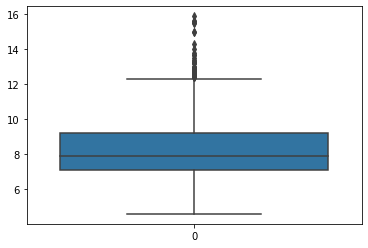

In [5]:
sns.boxplot(data = df['fixed acidity'])
plt.show()

Here we are using the IQR menthod to find outiers and replace them with mean median imputations

In [6]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(df['fixed acidity'])
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [12.4, 12.4, 12.4, 12.4, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.6, 12.6, 12.6, 12.6, 12.7, 12.7, 12.7, 12.7, 12.8, 12.8, 12.8, 12.8, 12.8, 12.9, 12.9, 13.0, 13.0, 13.0, 13.2, 13.2, 13.2, 13.3, 13.3, 13.3, 13.4, 13.5, 13.7, 13.7, 13.8, 14.0, 14.3, 15.0, 15.0, 15.5, 15.5, 15.6, 15.6, 15.9]


In [7]:
median = np.median(df['fixed acidity'])# Replace with median
for i in sample_outliers:
    df['fixed acidity'] = np.where(df['fixed acidity']==i, median, df['fixed acidity'])
print("Sample: ", df['fixed acidity'])

# print(x.dtype)

Sample:  0        7.4
1        7.8
2        7.8
3       11.2
4        7.4
        ... 
1594     6.2
1595     5.9
1596     6.3
1597     5.9
1598     6.0
Name: fixed acidity, Length: 1599, dtype: float64


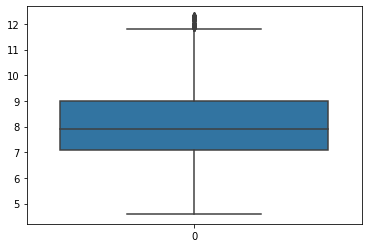

In [8]:
sns.boxplot(data = df['fixed acidity'])
plt.show()

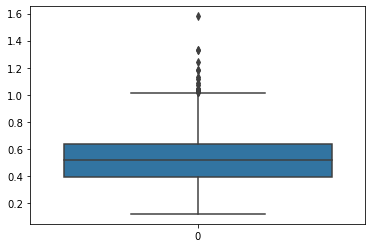

In [9]:
sns.boxplot(data = df['volatile acidity'])
plt.show()

In [10]:
sample_outliers_va = detect_outliers_iqr(df['volatile acidity'])
median = np.median(df['volatile acidity'])# Replace with median
for i in sample_outliers_va:
    df['volatile acidity'] = np.where(df['volatile acidity']==i, median, df['volatile acidity'])

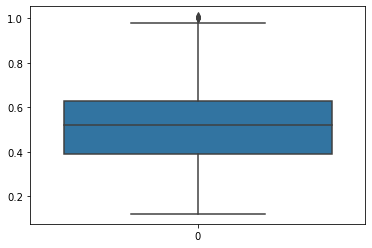

In [11]:
sns.boxplot(data = df['volatile acidity'])
plt.show()

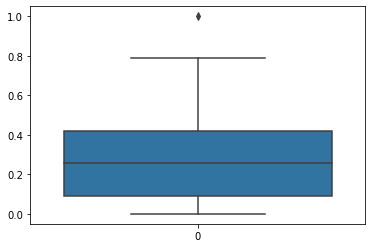

In [12]:
sns.boxplot(data = df['citric acid'])
plt.show()

In [13]:
sample_outliers_ca = detect_outliers_iqr(df['citric acid'])
median = np.median(df['citric acid'])# Replace with median
for i in sample_outliers_ca:
    df['citric acid'] = np.where(df['citric acid']==i, median, df['citric acid'])

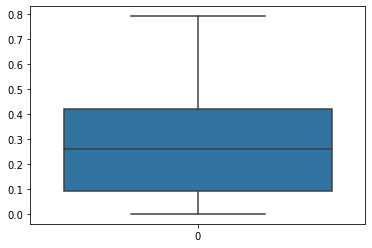

In [14]:
sns.boxplot(data = df['citric acid'])
plt.show()

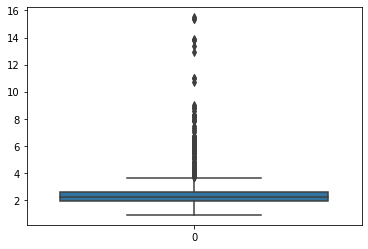

In [15]:
sns.boxplot(data = df['residual sugar'])
plt.show()

In [16]:
sample_outliers_rs = detect_outliers_iqr(df['residual sugar'])
median = np.median(df['residual sugar'])# Replace with median
for i in sample_outliers_rs:
    df['residual sugar'] = np.where(df['residual sugar']==i, median, df['residual sugar'])

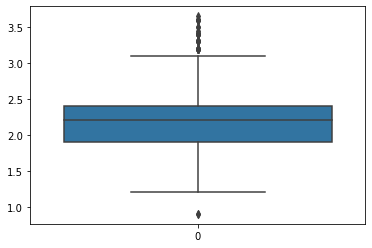

In [17]:
sns.boxplot(data = df['residual sugar'])
plt.show()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [19]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.154534,0.520547,0.270513,2.181801,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.490883,0.165588,0.193945,0.426845,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.000000,0.630000,0.420000,2.400000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,12.300000,1.010000,0.790000,3.650000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


From above we got 5 point summary of the data

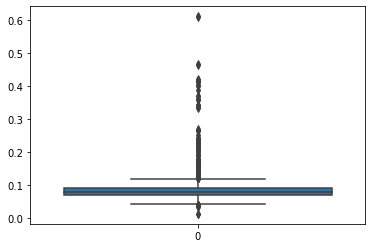

In [20]:
sns.boxplot(data = df['chlorides'])
plt.show()

In [21]:
sample_outliers_ch = detect_outliers_iqr(df['chlorides'])
median = np.median(df['chlorides'])# Replace with median
for i in sample_outliers_ch:
    df['chlorides'] = np.where(df['chlorides']==i, median, df['chlorides'])

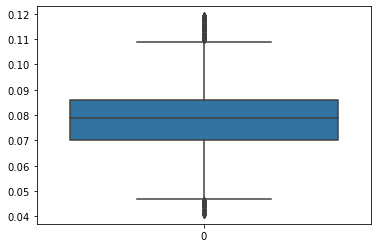

In [22]:
sns.boxplot(data = df['chlorides'])
plt.show()

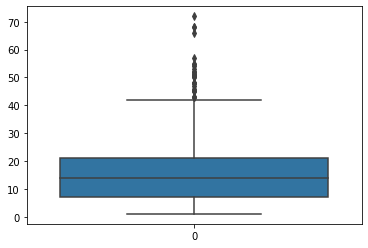

In [23]:
sns.boxplot(data = df['free sulfur dioxide'])
plt.show()

In [24]:
sample_outliers_fsd = detect_outliers_iqr(df['free sulfur dioxide'])
median = np.median(df['free sulfur dioxide'])# Replace with median
for i in sample_outliers_fsd:
    df['free sulfur dioxide'] = np.where(df['free sulfur dioxide']==i, median, df['free sulfur dioxide'])

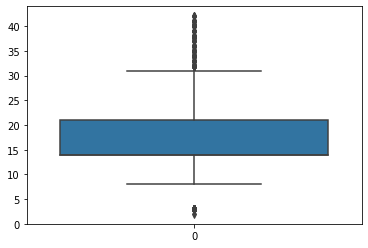

In [25]:
sns.boxplot(data = df['free sulfur dioxide'])
plt.show()

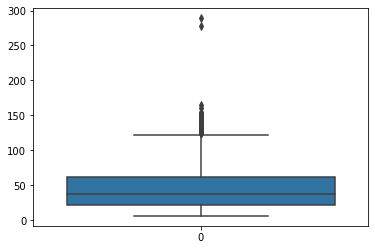

In [26]:

sns.boxplot(data = df['total sulfur dioxide'])
plt.show()

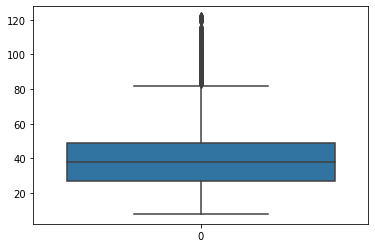

In [27]:
sample_outliers_fsd = detect_outliers_iqr(df['total sulfur dioxide'])
median = np.median(df['total sulfur dioxide'])# Replace with median
for i in sample_outliers_fsd:
    df['total sulfur dioxide'] = np.where(df['total sulfur dioxide']==i, median, df['total sulfur dioxide'])
sns.boxplot(data = df['total sulfur dioxide'])
plt.show()

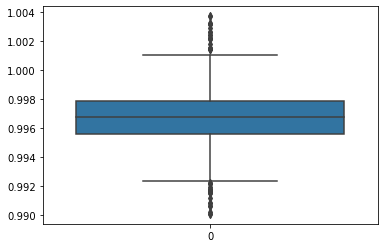

In [28]:
sns.boxplot(data = df['density'])
plt.show()

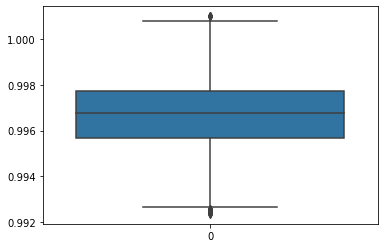

In [29]:
sample_outliers_fsd = detect_outliers_iqr(df['density'])
median = np.median(df['density'])# Replace with median
for i in sample_outliers_fsd:
    df['density'] = np.where(df['density']==i, median, df['density'])
sns.boxplot(data = df['density'])
plt.show()

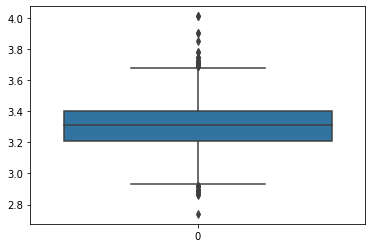

In [30]:
sns.boxplot(data = df['pH'])
plt.show()

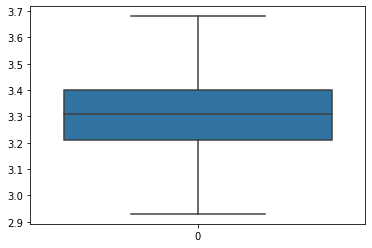

In [31]:
sample_outliers_fsd = detect_outliers_iqr(df['pH'])
median = np.median(df['pH'])# Replace with median
for i in sample_outliers_fsd:
    df['pH'] = np.where(df['pH']==i, median, df['pH'])
sns.boxplot(data = df['pH'])
plt.show()

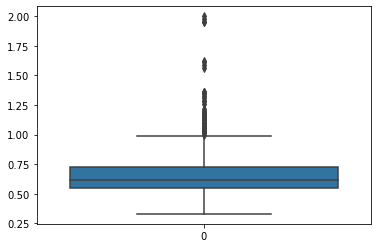

In [32]:
sns.boxplot(data = df['sulphates'])
plt.show()

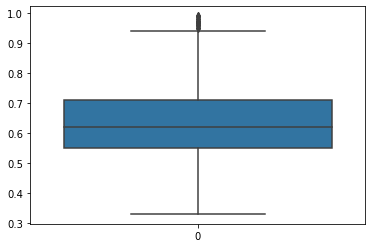

In [33]:
sample_outliers_fsd = detect_outliers_iqr(df['sulphates'])
median = np.median(df['sulphates'])# Replace with median
for i in sample_outliers_fsd:
    df['sulphates'] = np.where(df['sulphates']==i, median, df['sulphates'])
sns.boxplot(data = df['sulphates'])
plt.show()

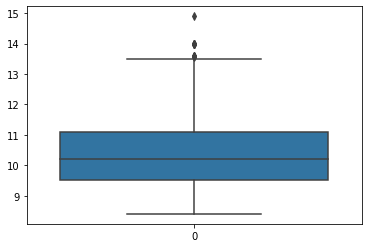

In [34]:
sns.boxplot(data = df['alcohol'])
plt.show()

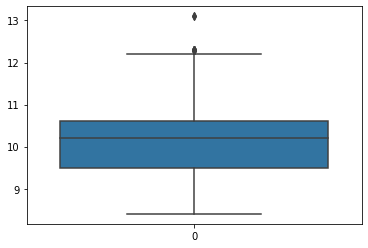

In [35]:
sample_outliers_fsd = detect_outliers_iqr(df['alcohol'])
median = np.median(df['alcohol'])# Replace with median
for i in sample_outliers_fsd:
    df['alcohol'] = np.where(df['alcohol']==i, median, df['alcohol'])
sns.boxplot(data = df['alcohol'])
plt.show()

# Analysis of the Data

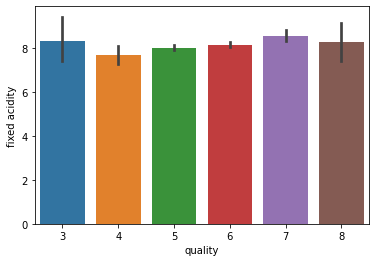

In [36]:
sns.barplot(x = df['quality'], y = df['fixed acidity'] )
plt.show()

From the above graph we can observe that fixed acidity has very less relation with the quality

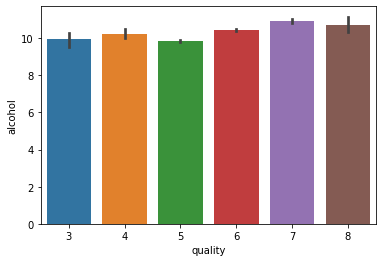

In [37]:
sns.barplot(x = df['quality'], y = df['alcohol'] )
plt.show()

from the above plot we can say that as quality increses the alchohol is also incresing

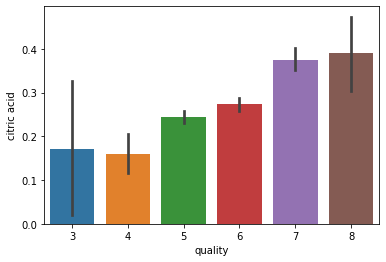

In [38]:
sns.barplot(x = df['quality'], y = df['citric acid'] )
plt.show()

from the above plot we can say that there is a good relation between citric acid and quality. As quality increses the citric acid also increses

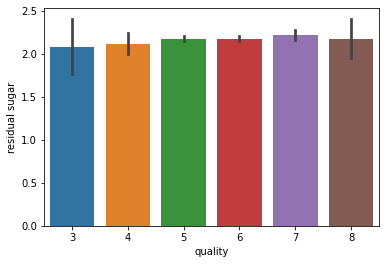

In [39]:
sns.barplot(x = df['quality'], y = df['residual sugar'] )
plt.show()

residual sugar has less variation over the quality 

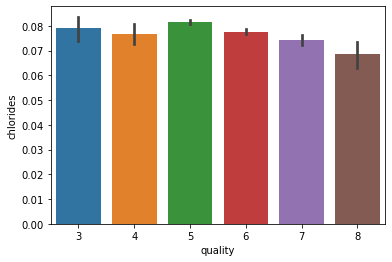

In [40]:
sns.barplot(x = df['quality'], y = df['chlorides'] )
plt.show()

chlorides has negative relation that is it decreses as quality increses

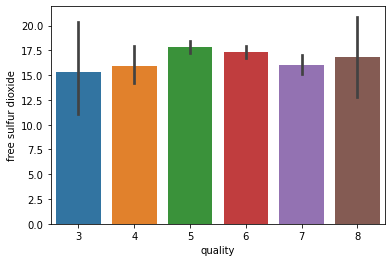

In [41]:
sns.barplot(x = df['quality'], y = df['free sulfur dioxide'] )
plt.show()

free sulfur dioxide seems to be less variant over the quality

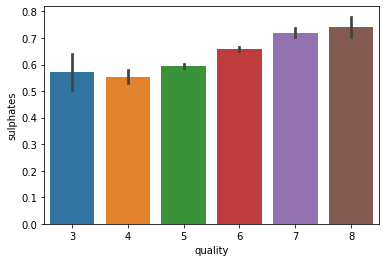

In [42]:
sns.barplot(x = df['quality'], y = df['sulphates'] )
plt.show()

sulphates has positive variation over quality

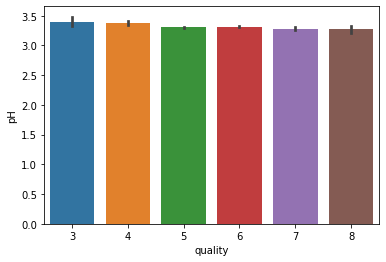

In [43]:
sns.barplot(x = df['quality'], y = df['pH'] )
plt.show()

pH is almost constant for all qualities of wine

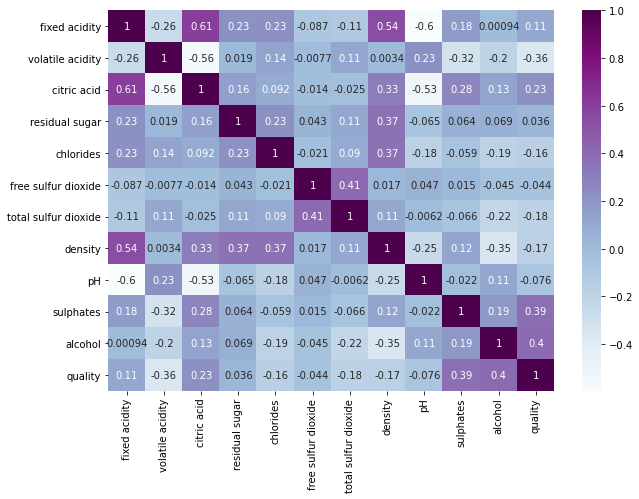

In [44]:
fig = plt.figure(figsize = (10,7))
sns.heatmap(data = df.corr(), annot = True, cmap="BuPu")
plt.show()

from the heatmap we can see that 'pH','free sulfur dioxide','residual sugar' are very less co related

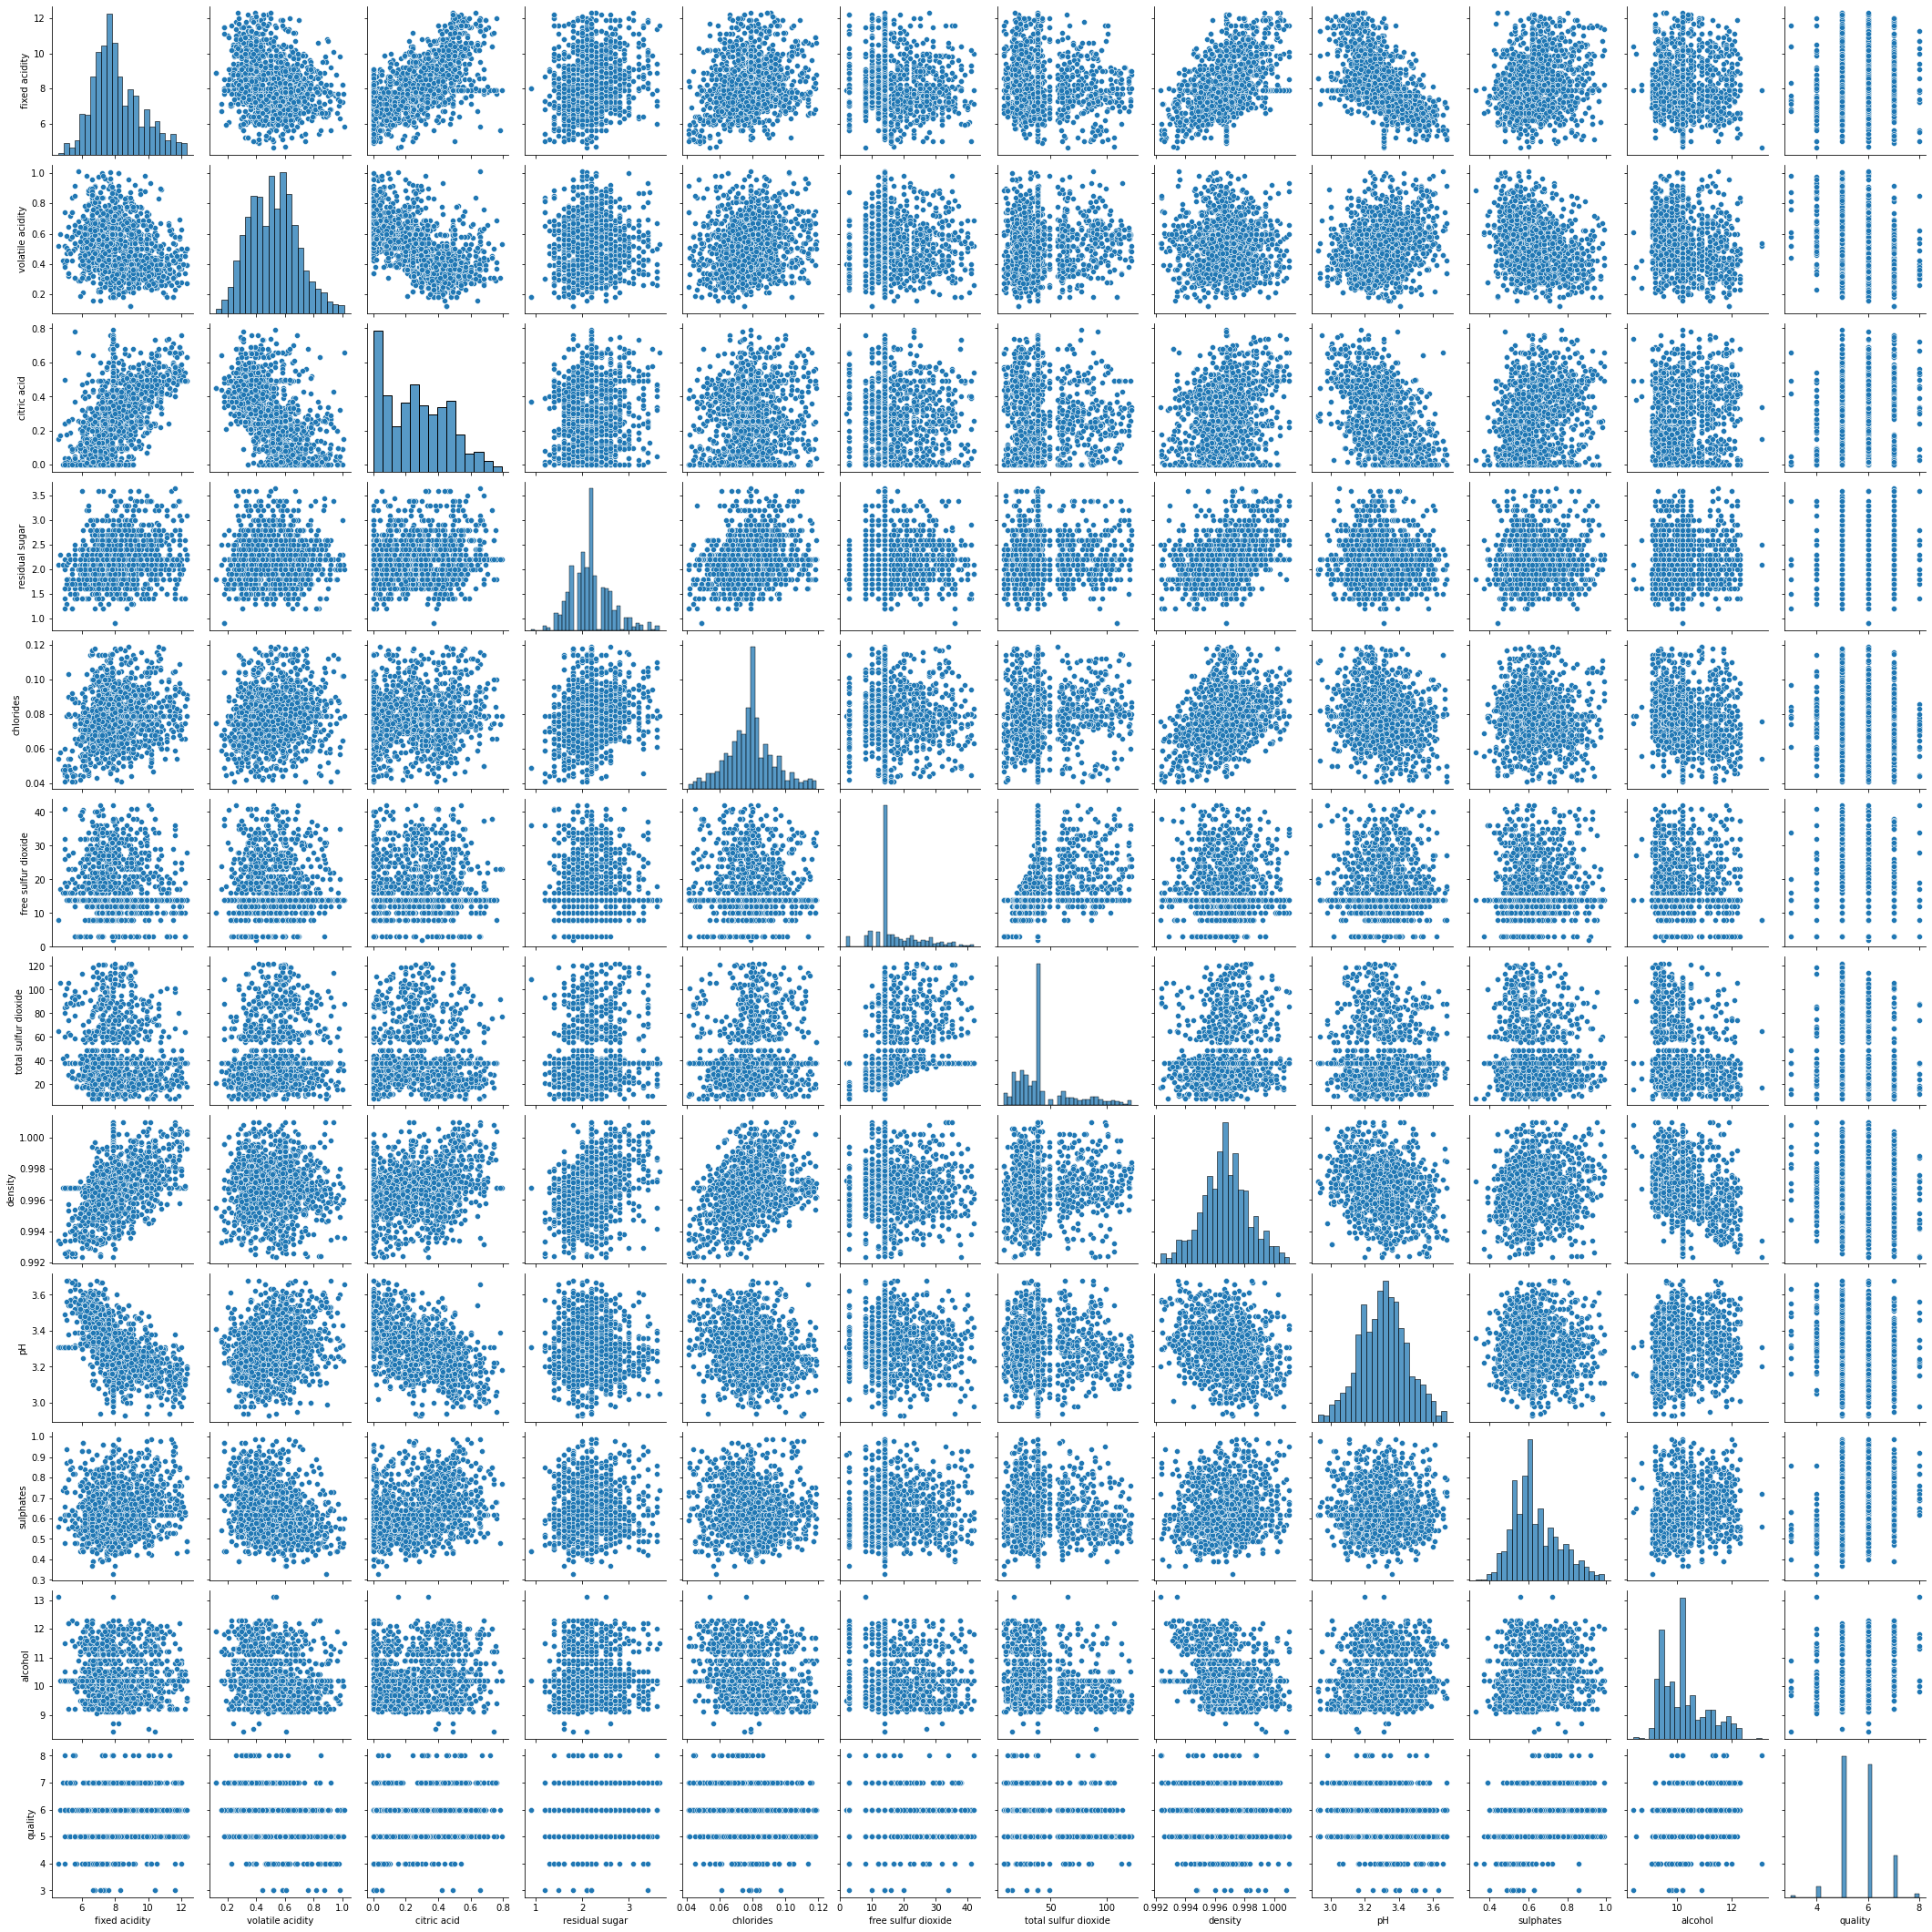

In [45]:
sns.pairplot(df)
plt.show()

observe the variation of data on all features

In [46]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [47]:
df['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

Now we will encode the labels of the quality 

In [48]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['quality'] = le.fit_transform(df['quality'])

In [49]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

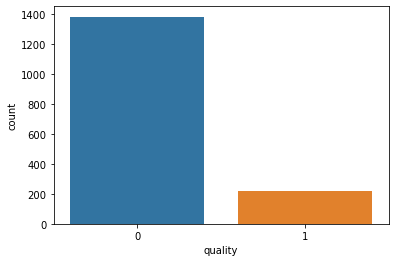

In [50]:
sns.countplot(df['quality'])
plt.show()

data is unbalanced we have to balance the data


# Declaring Independent and dependent features

In [51]:
X = df.drop('quality', axis = 1)
y = df['quality']

In [52]:
X.shape

(1599, 11)

In [53]:
y.shape

(1599,)

# Splitting the test data and train data

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Scaling the data using StandardScaler and apllying logestic regression


In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.853125


we got an  of accuracy_score of 0.85

In [59]:
print(classification_report(y_test, y_pred))
# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       273
           1       0.50      0.21      0.30        47

    accuracy                           0.85       320
   macro avg       0.69      0.59      0.61       320
weighted avg       0.82      0.85      0.83       320

[[263  10]
 [ 37  10]]


# Applying DecisionTreeClassifier

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [61]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# creating model
model = DecisionTreeClassifier()

# feeding the training set into the model
model.fit(X_train, y_train)

# predicting the results for the test set
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.85


In [63]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       413
           1       0.47      0.51      0.49        67

    accuracy                           0.85       480
   macro avg       0.69      0.71      0.70       480
weighted avg       0.86      0.85      0.85       480

[[374  39]
 [ 33  34]]


Here we got an accuracy of 86.8%

# Applying the RandomForestClassifier

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
# creating the model
modelRan = RandomForestClassifier(n_estimators = 200)

# feeding the training set into the model
modelRan.fit(X_train, y_train)

# predicting the results for the test set
y_pred = modelRan.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.86875


In [65]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       273
           1       0.60      0.32      0.42        47

    accuracy                           0.87       320
   macro avg       0.75      0.64      0.67       320
weighted avg       0.85      0.87      0.85       320

[[263  10]
 [ 32  15]]


for random forest we are getting 87.1% accuracy

From the above 3 we can see that Random Forest is getting more Accuracy

In [66]:
from sklearn import svm
svc = svm.SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)
print(accuracy_score(y_test, pred_svc))


0.86875


In [67]:
print(classification_report(y_test, pred_svc))
print(confusion_matrix(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.67      0.21      0.32        47

    accuracy                           0.87       320
   macro avg       0.77      0.60      0.62       320
weighted avg       0.85      0.87      0.84       320

[[268   5]
 [ 37  10]]


In [68]:
from sklearn.model_selection import GridSearchCV, cross_val_score
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [69]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [70]:
grid_svc.best_params_

{'C': 1.4, 'gamma': 1.4, 'kernel': 'rbf'}

In [71]:
svc2 = svm.SVC(C = 1.4, gamma =  1.4, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(accuracy_score(y_test, pred_svc2))
print(classification_report(y_test, pred_svc2))
print(confusion_matrix(y_test, pred_svc2))

0.896875
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       273
           1       1.00      0.30      0.46        47

    accuracy                           0.90       320
   macro avg       0.95      0.65      0.70       320
weighted avg       0.91      0.90      0.87       320

[[273   0]
 [ 33  14]]


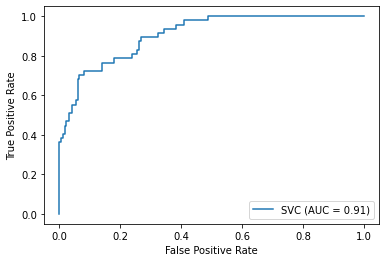

In [75]:
from sklearn.metrics import plot_roc_curve
svc_disp = plot_roc_curve(svc2, X_test, y_test)
plt.show()


In [72]:
modelRan_eval = cross_val_score(estimator = modelRan, X = X_train, y = y_train, cv = 10)
modelRan_eval.mean()

0.9069697342519685

By using cross validation score our model Accuracy has incresed from 87% to 90.696%

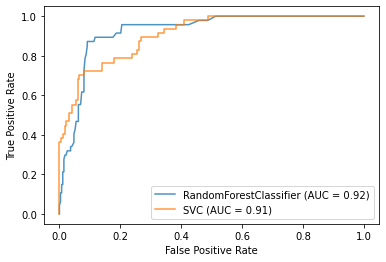

In [82]:
ax = plt.gca()
rfc_disp = plot_roc_curve(modelRan, X_test, y_test, ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8)
plt.show()